In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from textblob import TextBlob

In [5]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Fake Postings.csv")

In [7]:
df.head()

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent
0,Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,"Basic knowledge in live, no degree required. F...",Rivera and Sons - Established 2022.,West Jeffrey,$55016-$100476,Internship,IT,Free meals,1
1,Conference centre manager,Government whom its bed go tax tree black. Ear...,"Basic knowledge in seek, no degree required. F...","Davidson, Jones and Gomez - Established 2003.",Lake Meredithberg,$53438-$93138,Part-Time,Finance,Flexible hours,1
2,"Engineer, land",I member discuss follow way there nation. Earn...,"Basic knowledge in worker, no degree required....",Allen Ltd - Established 1998.,Lake Cathybury,$45584-$105229,Part-Time,IT,Free travel,1
3,Forest/woodland manager,House across wait approach face. Earn $5000/we...,"Basic knowledge in example, no degree required...",Forbes Ltd - Established 1990.,South Matthewstad,$66188-$139621,Full-Time,Education,Free travel,1
4,"Production designer, theatre/television/film",Case best environmental full finally leader me...,"Basic knowledge in smile, no degree required. ...","Jennings, Martin and Sanchez - Established 1975.",East Rhondafurt,$32183-$115012,Temporary,Retail,Flexible hours,1


In [9]:
df['description'].isnull().sum()

0

In [11]:
df['description'].shape

(10000,)

In [25]:
df = df.dropna(subset=['description'])

In [13]:
df['description'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: description
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [27]:
df['description'] = df['description'].astype('string')

In [17]:
df['description'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: description
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [29]:
df['description'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
9995    <class 'str'>
9996    <class 'str'>
9997    <class 'str'>
9998    <class 'str'>
9999    <class 'str'>
Name: description, Length: 10000, dtype: object

In [31]:
non_string_rows = df[df['description'].apply(lambda x: not isinstance(x, str))]

In [33]:
non_string_rows

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent


In [35]:
df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

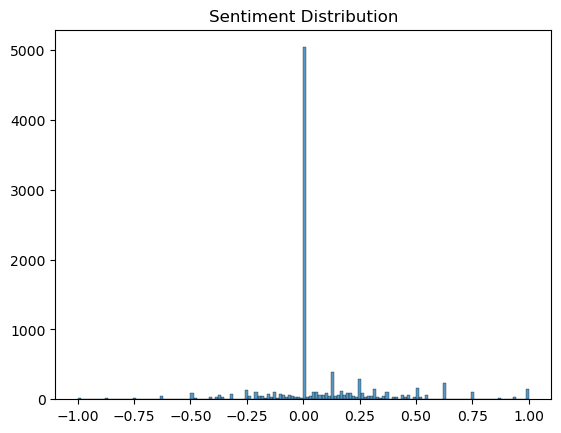

In [37]:
sns.histplot(df['sentiment'])
plt.xlabel("")
plt.ylabel("")
plt.title("Sentiment Distribution")
plt.show()

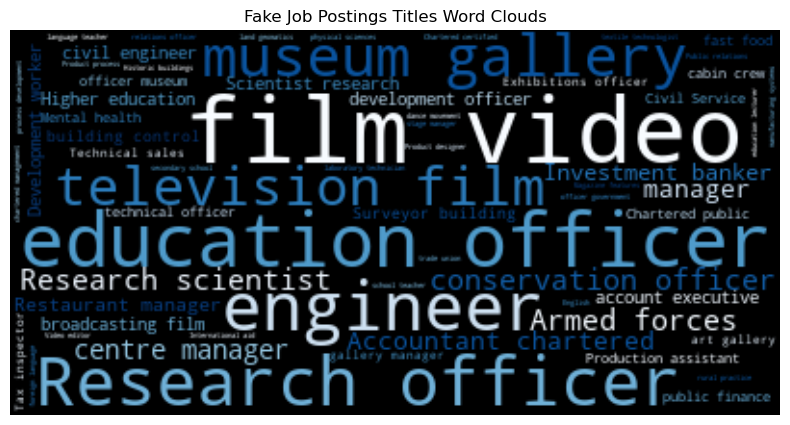

In [47]:
descriptions = " ".join(df["title"])
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(background_color='black', colormap='Blues').generate(descriptions)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Fake Job Postings Titles Word Clouds')
plt.show()

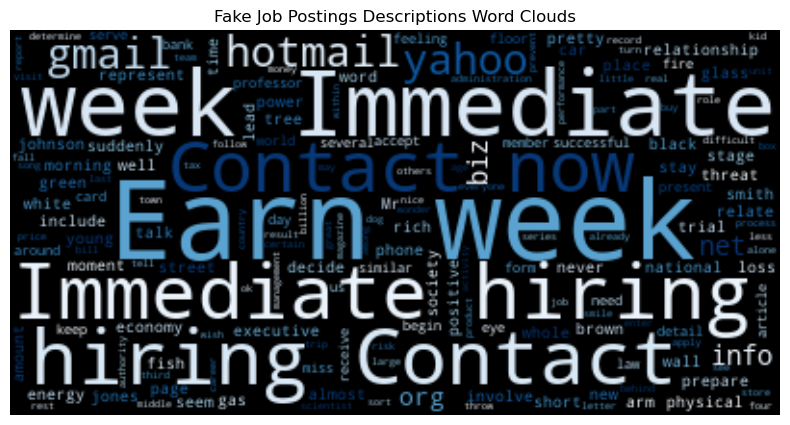

In [51]:
descriptions = " ".join(df["description"])
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(background_color='black', colormap='Blues').generate(descriptions)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Fake Job Postings Descriptions Word Clouds')
plt.show()

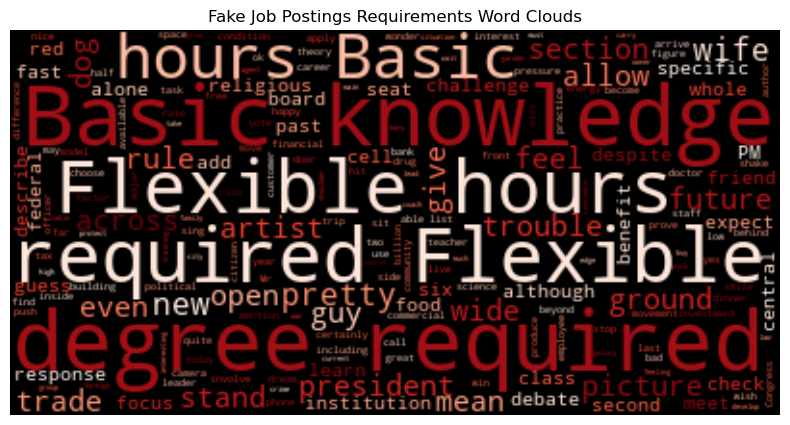

In [63]:
descriptions = " ".join(df["requirements"])
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(background_color='black', colormap='Reds').generate(descriptions)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Fake Job Postings Requirements Word Clouds')
plt.show()

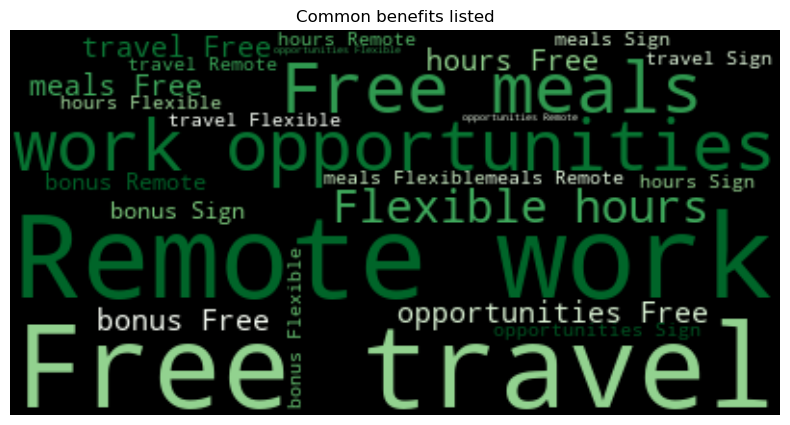

In [61]:
descriptions = " ".join(df["benefits"])
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(background_color='black', colormap='Greens').generate(descriptions)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Common benefits listed')
plt.show()

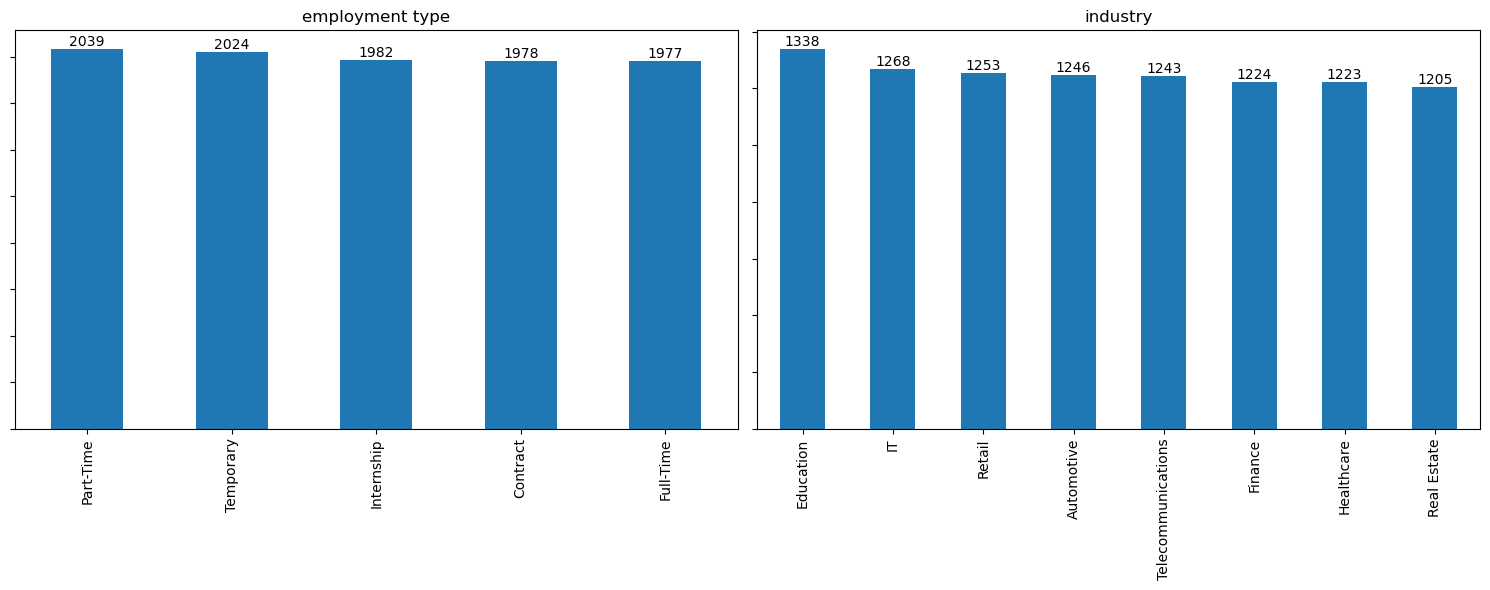

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

for i, j in enumerate(["employment_type", "industry"]):
    df[j].value_counts().plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_yticklabels(())
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

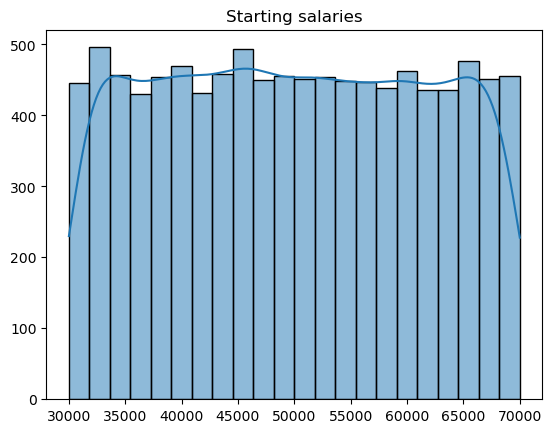

In [59]:
nums = "0123456789"
def process_start_salary(x):
    x = x.split('-')[0]
    x = x.strip()
    line = ""
    for i in x:
        if i in nums:
            line += i
    return int(line)

df["starting_salary"] = df["salary_range"].apply(process_start_salary)

sns.histplot(df, x="starting_salary", kde=True)
plt.xlabel("")
plt.ylabel("")
plt.title("Starting salaries")
plt.show()

#using LogisticRegression

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
df.isnull().sum()

title                 0
description           0
requirements          0
company_profile       0
location              0
salary_range          0
employment_type       0
industry              0
benefits              0
fraudulent            0
sentiment             0
starting_salary       0
description_length    0
num_requirements      0
dtype: int64

In [83]:
df['fraudulent'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: fraudulent
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [85]:
# Feature: Length of the job description
df['description_length'] = df['description'].apply(len)

# Feature: Number of requirements listed
df['num_requirements'] = df['requirements'].apply(lambda x: len(x.split(',')))

In [97]:
df['fraudulent'].nunique()

1

In [87]:
# Select features and target
features = ['description_length', 'num_requirements']
X = df[features]
y = df['fraudulent']

# Ensure there are at least two classes in the target variable
if len(y.unique()) < 2:
    print("The target variable 'fraudulent' must have at least two classes. Exiting...")
else:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

The target variable 'fraudulent' must have at least two classes. Exiting...


In [89]:
# Predict on the test set
if len(y.unique()) >= 2:
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

In [93]:
# Confusion matrix
if len(y.unique()) >= 2:
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [95]:
# Classification report
if len(y.unique()) >= 2:
    print(classification_report(y_test, y_pred))

#Using randomforest

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [103]:
df['text'] = df['title'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['company_profile']
df['text'].loc[1]

'Conference centre manager Government whom its bed go tax tree black. Earn $5000/week! Immediate hiring. Contact now at justinturner@gmail.com. Basic knowledge in seek, no degree required. Flexible hours. Davidson, Jones and Gomez - Established 2003.'

In [105]:
X = df['text']
y = df['fraudulent']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [120]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [122]:
y_pred = model.predict(X_test_tfidf)

In [124]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [126]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[2000]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
